In [48]:
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()


Dataset Description 

In [49]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

the output labels 

In [50]:
bc.target[100]

0

Features

In [51]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

Preprocessing

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, train_size=0.2)

In [53]:
print(f"Features->x_train{x_train.shape}, x_test{x_test.shape}")
print(f"Labels->y_train{y_train.shape}, y_test{y_test.shape}")

Features->x_train(113, 30), x_test(456, 30)
Labels->y_train(113,), y_test(456,)


In [54]:
x_train[0]

array([1.453e+01, 1.934e+01, 9.425e+01, 6.597e+02, 8.388e-02, 7.800e-02,
       8.817e-02, 2.925e-02, 1.473e-01, 5.746e-02, 2.535e-01, 1.354e+00,
       1.994e+00, 2.304e+01, 4.147e-03, 2.048e-02, 3.379e-02, 8.848e-03,
       1.394e-02, 2.327e-03, 1.630e+01, 2.839e+01, 1.081e+02, 8.305e+02,
       1.089e-01, 2.649e-01, 3.779e-01, 9.594e-02, 2.471e-01, 7.463e-02])

Normalization 

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [56]:
x_train[0]

array([0.35728146, 0.431     , 0.34869739, 0.21896076, 0.19643592,
       0.2000777 , 0.24255846, 0.1557508 , 0.10141685, 0.1230533 ,
       0.04966623, 0.30980734, 0.05764643, 0.02778116, 0.0883814 ,
       0.20168121, 0.23547038, 0.21633252, 0.06717027, 0.10644187,
       0.2977588 , 0.51871658, 0.28731511, 0.15859713, 0.17335737,
       0.26928545, 0.32299145, 0.33463551, 0.16492986, 0.16486968])

CLassification

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train=accuracy_score(y_true= y_train, y_pred= y_pred_train)
    acc_test=accuracy_score(y_true= y_test, y_pred= y_pred_test)
    r=recall_score(y_true= y_test, y_pred= y_pred_test)
    p=precision_score(y_true= y_test, y_pred= y_pred_test)
    print(f"acc_tran {acc_train}, acc_test {acc_test}, precision {p}, recall {r}")
    return acc_train, acc_test, p, r

1_Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train, y_train)

y_pred_train= gnb.predict(x_train)
y_pred_test=gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb =calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_tran 0.9380530973451328, acc_test 0.9254385964912281, precision 0.9377162629757786, recall 0.9442508710801394


2_KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

y_pred_train= knn.predict(x_train)
y_pred_test=knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn =calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_tran 0.9823008849557522, acc_test 0.9473684210526315, precision 0.939799331103679, recall 0.9790940766550522


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Decision Tree


In [60]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(max_depth=128, min_samples_split=4, criterion='entropy')
dt.fit(x_train, y_train)

y_pred_train= dt.predict(x_train)
y_pred_test=  dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt =calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc_tran 1.0, acc_test 0.9100877192982456, precision 0.9072847682119205, recall 0.9547038327526133


Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8  )
rf.fit(x_train, y_train)

y_pred_train= rf.predict(x_train)
y_pred_test=  rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf =calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_tran 1.0, acc_test 0.9429824561403509, precision 0.9364548494983278, recall 0.975609756097561


5-SVM


In [62]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train, y_train)

y_pred_train= svm.predict(x_train)
y_pred_test=  svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm =calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_tran 0.9823008849557522, acc_test 0.9407894736842105, precision 0.9362416107382551, recall 0.9721254355400697


6-Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train, y_train)

y_pred_train= lr.predict(x_train)
y_pred_test=  lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr =calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_tran 0.9646017699115044, acc_test 0.9385964912280702, precision 0.919093851132686, recall 0.9895470383275261


7-ANN

In [64]:
from sklearn.neural_network import MLPClassifier
ann= MLPClassifier(hidden_layer_sizes=128, activation='relu', solver='adam', batch_size=32)
ann.fit(x_train, y_train)

y_pred_train= ann.predict(x_train)
y_pred_test=  ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann =calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_tran 0.9911504424778761, acc_test 0.9671052631578947, precision 0.9594594594594594, recall 0.9895470383275261


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Comparison

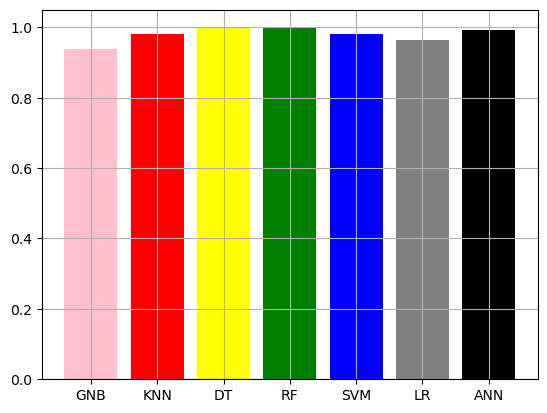

In [65]:
import matplotlib.pyplot as plt
acc_train= [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title=['GNB', "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors=['pink','red', 'yellow', 'green', 'blue', 'gray', 'black']
plt.bar(title, acc_train,color=colors)
plt.grid()
plt.show()


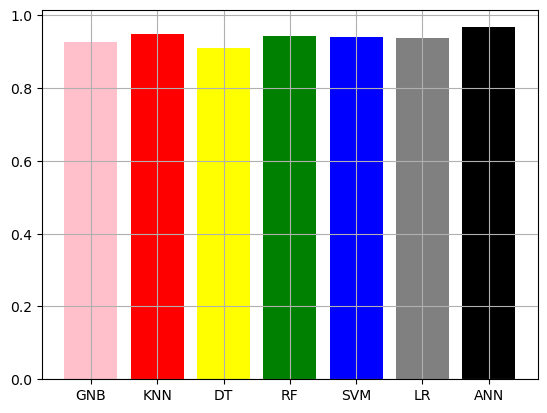

In [66]:
import matplotlib.pyplot as plt
acc_test= [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title=['GNB', "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors=['pink','red', 'yellow', 'green', 'blue', 'gray', 'black']
plt.bar(title, acc_test,color=colors)
plt.grid()
plt.show()